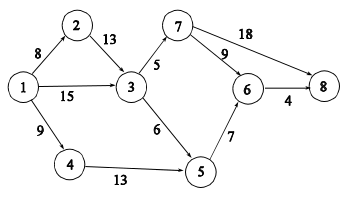

In [1]:
# Let's create this graph in NetworkX
import networkx as nx

In [2]:
# First, create an empty directed graph (digraph)
D = nx.DiGraph()  

In [3]:
# Next, add the nodes:
my_nodes = [ 1, 2, 3, 4, 5, 6, 7, 8 ]
D.add_nodes_from( my_nodes )

print(D.nodes)

[1, 2, 3, 4, 5, 6, 7, 8]


In [4]:
# # Alternatively, we could add them in one line:
# D.add_nodes_from(range(1,9))

# # Or, we could add them using a for-loop:
# for i in range(1,9):
#     D.add_node(i)

In [5]:
# Then, add the edges and their weights:
edge_weights = { (1,2) : 8, (1,3) : 15, (1,4) : 9,  (2,3) : 13, 
                 (3,5) : 6, (3,7) : 5,  (4,5) : 13, (5,6) : 7, 
                 (6,8) : 4, (7,6) : 9,  (7,8) : 18 }

for i,j in edge_weights.keys():
    D.add_edge( i, j, weight = edge_weights[i,j] )

print(D.edges)

[(1, 2), (1, 3), (1, 4), (2, 3), (3, 5), (3, 7), (4, 5), (5, 6), (6, 8), (7, 6), (7, 8)]


In [6]:
# Let's check their weights too:
for e in D.edges:
    print("edge",e,"has weight",D.edges[e]['weight'])

edge (1, 2) has weight 8
edge (1, 3) has weight 15
edge (1, 4) has weight 9
edge (2, 3) has weight 13
edge (3, 5) has weight 6
edge (3, 7) has weight 5
edge (4, 5) has weight 13
edge (5, 6) has weight 7
edge (6, 8) has weight 4
edge (7, 6) has weight 9
edge (7, 8) has weight 18


In [7]:
# Alternatively, we could write:
# for i,j in D.edges:
#     print("edge (",i,",",j,") has weight",D.edges[i,j]['weight'])

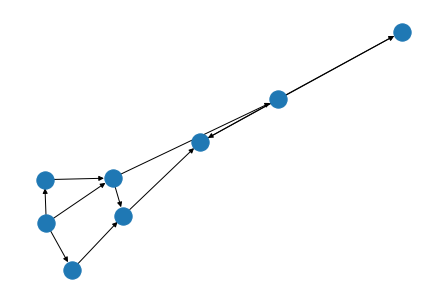

In [8]:
# draw the graph
nx.draw(D)

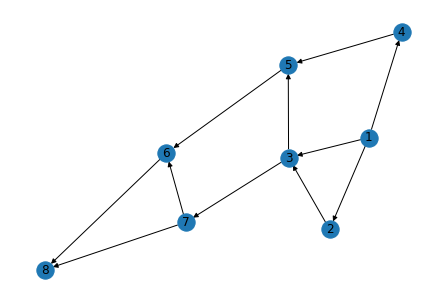

In [9]:
# draw the graph, with the node labels
nx.draw(D,with_labels=True)

{(1, 2): Text(0.282250264517487, 0.14426238911408895, '8'),
 (1, 3): Text(0.2568086315219232, 0.004419125649282582, '15'),
 (1, 4): Text(0.6508110637071166, 0.10599828827135455, '9'),
 (2, 3): Text(0.10050562363628321, 0.04520513851761769, '13'),
 (3, 5): Text(0.25288445053076225, -0.1031565688857316, '6'),
 (3, 7): Text(-0.21953654417666407, -0.04172706129806943, '5'),
 (4, 5): Text(0.6468868827159556, -0.0015774062636596392, '13'),
 (5, 6): Text(0.005751852153623754, -0.18683262084790075, '7'),
 (6, 8): Text(-0.7096006030567787, -0.10095792155236098, '4'),
 (7, 6): Text(-0.46666914255380254, -0.1254031132602386, '9'),
 (7, 8): Text(-0.7570685394970238, 0.03562919405892743, '18')}

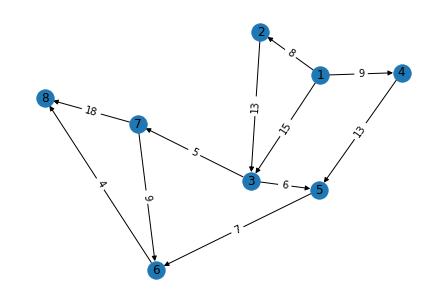

In [10]:
# Add the edge weights to the drawing:
pos = nx.spring_layout(D)
nx.draw(D,pos=pos,with_labels=True)
nx.draw_networkx_edge_labels(D,pos=pos,edge_labels=edge_weights)

In [11]:
import json
from networkx.readwrite import json_graph

def write_graph_to_json(graph, json_file):
    data = json_graph.adjacency_data(graph)
    with open(json_file, "w") as f:
        json.dump(data,f)
    return

def read_graph_from_json(json_file):
    with open(json_file) as f:
        data = json.load(f)
    return json_graph.adjacency_graph(data) 

In [12]:
# Let's save our network to a file
filename = 'my_network.json'
write_graph_to_json(D, filename)

In [13]:
# Clear D to become the empty graph
D = nx.DiGraph()
print(D.nodes,D.edges)

[] []


In [14]:
# Read the graph 
D = read_graph_from_json(filename)
print(D.nodes,D.edges)

[1, 2, 3, 4, 5, 6, 7, 8] [(1, 2), (1, 3), (1, 4), (2, 3), (3, 5), (3, 7), (4, 5), (5, 6), (6, 8), (7, 6), (7, 8)]


In [15]:
# Check that the edge weights still exist
for e in D.edges:
    print("Edge",e,"has weight",D.edges[e]['weight'])

Edge (1, 2) has weight 8
Edge (1, 3) has weight 15
Edge (1, 4) has weight 9
Edge (2, 3) has weight 13
Edge (3, 5) has weight 6
Edge (3, 7) has weight 5
Edge (4, 5) has weight 13
Edge (5, 6) has weight 7
Edge (6, 8) has weight 4
Edge (7, 6) has weight 9
Edge (7, 8) has weight 18
